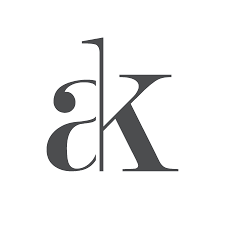

# Statistical Inference and Hypothesis Testing

**Statistics** is a science of inference. It is the science of generalization from a part(the randomly chosen sample) to the whole (the population).

**Statistical inference** is the process of deducing properties of an underlying distribution by analysis of data. Inferential statistical analysis infers properties about a population: this includes testing hypotheses and deriving estimates.

Statistics are helpful in analyzing most collections of data. **Hypothesis testing** can justify conclusions even when no
scientific theory exists.

## Average Experience of Data Science Specialization(DSS) batch with Statistical Inference
We will aim to study how accurately can we characterize the actual average participant experience (population mean) from the samples of data (sample mean). We can quantify the certainity of outcome through the confidence intervals

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Let us explore the original data

dss_exp = np.array([12,  15,  13,  20,  19,  20,  11,  19,  11,  12,  19,  13,  
                    12,  10,  6,  19,  3,  1,  1,  0,  4,  4,  6,  5,  3,  7,  
                    12,  7,  9,  8,  12,  11,  11,  18,  19,  18,  19,  3,  6,  
                     5,  6,  9,  11,  10,  14,  14,  16,  17,  17,  19,  0,  2,  
                     0,  3,  1,  4,  6,  6,  8,  7,  7,  6,  7,  11,  11,  10,  
                    11,  10,  13,  13,  15,  18,  20,  19,  1,  10,  8,  16,  
                    19,  19,  17,  16,  11,  1,  10,  13,  15,  3,  8,  6,  9,  
                    10,  15,  19,  2,  4,  5,  6,  9,  11,  10,  9,  10,  9,  
                    15,  16,  18,  13])

### Understanding the Underlying distribution of Experience

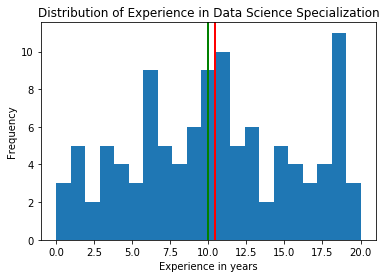

Mean Experience of DSS Batch: 10.435
Std Deviation of Experience of DSS Batch: 5.665


In [54]:
# Plot the distribution of Experience
plt.hist(dss_exp, range = (0,20), bins = 21)
# Add axis labels
plt.xlabel("Experience in years")
plt.ylabel("Frequency")
plt.title("Distribution of Experience in Data Science Specialization")
plt.axvline(x=dss_exp.mean(), linewidth=2, color = 'r') # Draws the red vertical line in graph at the average experience
plt.axvline(x=np.median(dss_exp), linewidth=2, color = 'g') # Draws the red vertical line in graph at the average experience
plt.show()

# Statistics of DSS Batch experience
print("Mean Experience of DSS Batch: {:4.3f}".format(dss_exp.mean()))
print("Std Deviation of Experience of DSS Batch: {:4.3f}".format(dss_exp.std()))


In [116]:
# Set the parameters for sampling
n = 10
NUM_TRIALS = 100

### Estimating DSS Experience from samples

In [117]:
#Just try for 1 iteration

samp = np.random.choice(dss_exp, size = n, replace = True)
samp_mean = samp.mean()
samp_sd = samp.std()
print("Samp_mean = {:4.3f} Sample_SD = {:4.3f}".format(samp_mean, samp_sd))


Samp_mean = 9.700 Sample_SD = 4.584


In [118]:
samp # Display the sample values

array([10,  1, 13, 10, 13, 15,  5,  4, 11, 15])

### How will the distribution of Sample Mean look like

We are now drawing samples for 1000 times (NUM_TRIALS) and compute the mean each time. The distribution is plotted to identify range of values it can take. The original data has experience raging between 0 years and 20 years and spread across it. 

In [119]:
# Distribution of Sample means

np.random.seed(100)
mn_array = np.zeros(NUM_TRIALS)
sd_array = np.zeros(NUM_TRIALS)

# Extract Random Samples and compute mean & standard deviation
for i in range(NUM_TRIALS):
  samp = np.random.choice(dss_exp, size = n, replace = True)
  mn_array[i] = samp.mean()
mn_array

array([  9.3,  10.2,  11.4,  12. ,  10.9,   8.7,   8.2,   9.2,  11.2,
        13.1,  12. ,   9. ,   8.8,   6.4,   7.6,  11.1,  11.6,  10.7,
        11.6,   9.2,   7.8,  10.1,   8.4,   8.2,   7.7,  10.3,  14.2,
        13.1,  12.3,   9.1,   8.6,   9.8,  10. ,  10. ,  10.9,  10.2,
         9.5,   9.9,   8.3,  12.8,  11.7,  13. ,   7.2,  12.1,  10.1,
        12. ,   9.4,   8.8,   9.3,  11.6,   9.8,  11.3,  10.9,  10.2,
        11.1,  10.9,   8.1,  11.5,  13.3,   6.5,   9.9,   9.1,   9.4,
         8.7,   9.4,  11.6,  14.3,  12.1,  10.8,   9. ,   8.9,   9.8,
        11.1,   8.2,  12. ,   8.8,  10.5,  10.5,   9.8,  10.1,  14.1,
         9.3,  11.4,  11.6,  10.8,  10.9,  11.9,  10.3,  13.7,   8.4,
        11.1,  12.2,  10.5,   9.2,   8. ,  10.1,  10.6,   8.7,  10. ,  11.1])

Mean = 10.301, Std Dev = 1.664, 5% Pct = 7.795, 95% Pct = 13.110


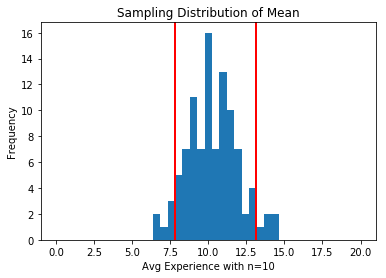

In [120]:
# Annotate the distribution - Not important for understanding
mn = mn_array.mean()
sd = mn_array.std()
x5_pct = np.percentile(mn_array, 5.0)
x95_pct = np.percentile(mn_array, 95.0)
print("Mean = {:4.3f}, Std Dev = {:4.3f}, 5% Pct = {:4.3f}, 95% Pct = {:4.3f}".format(mn, sd, x5_pct, x95_pct))


# Plot Sampling distribution of Mean    
plt.hist(mn_array, range=(0,20), bins = 41)
# Add axis labels
plt.xlabel("Avg Experience with n={}".format(n))
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Mean")
plt.axvline(x=x5_pct, linewidth=2, color = 'r')
plt.axvline(x=x95_pct, linewidth=2, color = 'r')
plt.show()

Mean = 10.301, Std Dev = 1.664, 5% Pct = 7.795, 95% Pct = 13.110


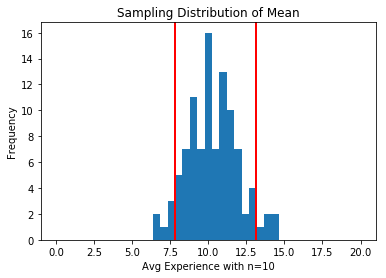

In [121]:
# Annotate the distribution - Not important for understanding
mn = mn_array.mean()
sd = mn_array.std()
x5_pct = np.percentile(mn_array, 5.0)
x95_pct = np.percentile(mn_array, 95.0)
print("Mean = {:4.3f}, Std Dev = {:4.3f}, 5% Pct = {:4.3f}, 95% Pct = {:4.3f}".format(mn, sd, x5_pct, x95_pct))


# Plot Sampling distribution of Mean    
plt.hist(mn_array, range=(0,20), bins = 41)
# Add axis labels
plt.xlabel("Avg Experience with n={}".format(n))
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Mean")
plt.axvline(x=x5_pct, linewidth=2, color = 'r')
plt.axvline(x=x95_pct, linewidth=2, color = 'r')
plt.show()

## Introduction to Central Limit Theorem

The original experience of students of Data science is in no way appears to be normal distribution.` It has peaks around 5 years, 10 years and 19 years experience.

The above plot is histogram of mean of samples for any given *n*. As you vary *n* from 1 to 128 you will see the following summary for the **Sampling Distribution of Mean** chart. The code for creating the below table is in the **Appendix Code 3** section. 

- n =   1, Mean = 10.301, Std Dev = 5.689, 5% Pct = 1.000, 95% Pct = 19.000
- n =   2, Mean = 10.431, Std Dev = 3.984, 5% Pct = 4.000, 95% Pct = 17.000
- n =   4, Mean = 10.388, Std Dev = 2.878, 5% Pct = 5.500, 95% Pct = 15.000
- n =   8, Mean = 10.407, Std Dev = 2.031, 5% Pct = 7.000, 95% Pct = 13.875
- n =  10, Mean = 10.455, Std Dev = 1.794, 5% Pct = 7.600, 95% Pct = 13.405
- n =  16, Mean = 10.467, Std Dev = 1.372, 5% Pct = 8.188, 95% Pct = 12.688
- n =  32, Mean = 10.470, Std Dev = 0.984, 5% Pct = 8.844, 95% Pct = 12.125
- n =  64, Mean = 10.446, Std Dev = 0.693, 5% Pct = 9.297, 95% Pct = 11.609
- n = 128, Mean = 10.451, Std Dev = 0.502, 5% Pct = 9.625, 95% Pct = 11.258

### Where n represents the number of times we take the sample.

One important point is to note the **trend in values of Std Dev in the above table as *n* increases**.

- n = 2 : Std Dev = 3.984 ~ 5.665/$\sqrt2$  where 5.665 is the standard deviation of the experience of the class (population std. dev)
- n = 4 : Std Dev = 2.878 ~ 5.665/$\sqrt4$
- n = 10 : Std Dev = 1.794 ~ 5.665/$\sqrt10$
- and so on ...

As *n* increases the Std Dev of *Sampling distribution of Mean* reduces from 5.689 (n = 1) to 0.502 (n = 128). As n increases the *Sampling distribution of Mean* looks more normal. **It is observed that when n >= 30 irrespective of the original distribution the Sampling distribution of Mean becomes normal distribution.**

![Sampling Mean evolves to normal distribution](http://flylib.com/books/2/528/1/html/2/images/figu115_1.jpg)


This has profound implications for statistical inference and because of this specific phenomenan we can quantify the certainity of the outcome. Without this result it is impossible to quantify the confidence interval of the sample mean.

To interpret alternatively if one takes 16 random samples from the data, it is likely that the average of 16 values will lie with 8.188 and 12.688 for 90% of the times.

### Definition of Central Limit Theorem

In probability theory, the central limit theorem (CLT) establishes that, for the most commonly studied scenarios, when independent random variables are added, their sum tends toward a **normal distribution** (commonly known as a bell curve) even if the original variables themselves are not normally distributed [Ref: Wikipedia]

The key point to note is that irrespective of the original distribution then sum (and hence average as well) of large samples tend towards normal distribution. This gives power to estimate the confidence intervals.


### Properties of Normal Distribution

Normal disribution has following characteristics

![Normal Distribution](http://flylib.com/books/2/528/1/html/2/images/figu114_1.jpg)

- ~68.3% of values lie within 1 Standard Deviation
- ~90.0% of values lie within 1.645 Standard Deviations
- ~95.0% of values lie within 1.96 Standard Deviations
- ~95.5% of values lie within 2 Standard Deviations
- ~99.7% of values lie within 3 Standard Deviations


In [59]:
# Function to check if the true mean lies within 90% Confidence Interval

def samp_mean_within_ci(mn, l_5pct, u_95pct):
    out = True
    if (mn < l_5pct) | (mn > u_95pct):
        out = False
        
    return out

#### Getting the average experience estimate from sample and Confidence Intervals

Now given the sample size *n* we can estimate the sample mean and confidence interval. The confidence interval is estimated assuming normal distribution which really holds good when n >= 30.

When n is increased the confidence interval becomes smaller which implies that results are obtained with higher certainity.

**Execute the code below multiple times and check how often the population mean of 10.435 will lie within 90% confidence interval. It should be on average 9 out of 10 times i.e 90% **

In [60]:
# Estimation and Confidence Interval
np.random.seed(100) # seed value is set to reproduce the results, remove it and try multiple execution

samp = np.random.choice(dss_exp, size = n, replace = True)
samp_mean = samp.mean()
samp_sd = samp.std()
sd_ci = samp_sd/np.sqrt(n) #  divided by sqrt(n) is done so as to compensate for the reduction in std. dev due to sample size of n

# sd_ci
# samp_sd

samp_lower_5pct = samp_mean - 1.645 * sd_ci # Lower 90% confidence interval (This is approximate version to build intution)
samp_upper_95pct = samp_mean + 1.645 * sd_ci # Upper 90% confidence interval (This is approximate version to build intution)

print("Pop Mean: {:4.3f} | Sample: L_5PCT = {:4.3f} | M = samp_mean = {:4.3f}  | H_95PCT = {:4.3f}".format(dss_exp.mean(), samp_lower_5pct, samp_mean, samp_upper_95pct))

# Checking if the population mean lies within 90% Confidence Interval (CI)
mn_within_ci_flag = samp_mean_within_ci(dss_exp.mean(), samp_lower_5pct, samp_upper_95pct)
print("True mean lies with the 90% confidence Intervel = {}".format(mn_within_ci_flag))

Pop Mean: 10.435 | Sample: L_5PCT = 5.733 | M = samp_mean = 9.300  | H_95PCT = 12.867
True mean lies with the 90% confidence Intervel = True


x+-z*sigma/root of n

Confidence Level	z*-value
80%	1.28
90%	1.645 (by convention)
95%	1.96
98%	2.33
99%	2.58

deviation, n is the sample size, and z* represents the appropriate z*-value from the standard normal distribution for
your desired confidence level.




## Hypothesis Testing

A statistical hypothesis, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables.[1] A statistical hypothesis test is a method of statistical inference. Commonly, two statistical data sets are compared, or a data set obtained by sampling is compared against a synthetic data set from an idealized model. A hypothesis is proposed for the statistical relationship between the two data sets, and this is compared as an alternative to an idealized null hypothesis that proposes no relationship between two data sets. The comparison is deemed statistically significant if the relationship between the data sets would be an unlikely realization of the null hypothesis according to a threshold probability—the significance level. Hypothesis tests are used in determining what outcomes of a study would lead to a rejection of the null hypothesis for a pre-specified level of significance. The process of distinguishing between the null hypothesis and the alternative hypothesis is aided by identifying two conceptual types of errors (type 1 & type 2), and by specifying parametric limits on e.g. how much type 1 error will be permitted. [Ref: Wikipedia]

Let us define the Hypotheses as follows:
- **H0** : Average Experience of Current Batch & Previous batch are **same**
- **H1** : Average Experience of Current Batch & Previous batch are **different**

In [61]:
# Previous Batch Data for working experience
dss_exp_prev = np.array([1, 14,  6,  7, 10, 10, 19, 15, 19, 15, 
                    2,  2, 14, 14, 14,  3,  0,  4, 11,  7, 
                    1,  2,  0,  1,  2,  2,  2,  1,  1,  2, 
                    4,  4,  3,  3,  3,  3,  4,  3,  3,  7, 
                    8,  6,  6,  6,  7, 8, 8, 8, 8, 7, 
                    8, 0, 0, 7, 6, 9, 10, 9, 9, 11, 
                    11, 9, 10, 10, 11, 10, 11, 9, 9, 9, 
                    12, 14, 13, 14, 18, 14, 11, 10, 17, 20, 
                    18, 5, 13, 4, 2, 4, 3, 12, 12, 14, 
                    12, 12, 10, 14, 4, 11, 9])

Previous DSS Batch: Avg Exp - 8.041 Std Dev - 5.034


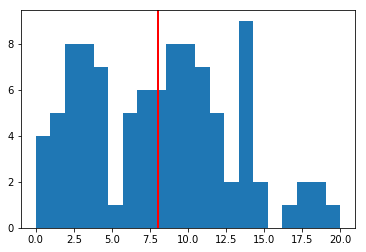

In [62]:
avg_exp_prev = dss_exp_prev.mean()
std_exp_prev = dss_exp_prev.std()
print("Previous DSS Batch: Avg Exp - {:4.3f} Std Dev - {:4.3f}".format(avg_exp_prev, std_exp_prev))

plt.hist(dss_exp_prev, range=(0,20), bins = 21)
plt.axvline(x=dss_exp_prev.mean(), linewidth=2, color = 'r')
plt.show()

In [81]:
np.mean(dss_exp)

10.435185185185185

In [82]:
np.random.seed(100)
n = 20

dss_mean = dss_exp.mean()
dss_sd   = dss_exp.std()
print("Current DSS Batch : Population Mean - {:4.3f}".format(dss_mean))

dss_prev_samp = np.random.choice(dss_exp_prev, size = n, replace = True)
dss_prev_samp_mean = dss_prev_samp.mean()
print("Previous DSS Batch Sample Mean: {:4.3f}".format(dss_prev_samp_mean))

Current DSS Batch : Population Mean - 10.435
Previous DSS Batch Sample Mean: 8.250


In [83]:
from scipy import stats
t_statistic = (dss_prev_samp_mean - dss_mean)/(dss_sd/np.sqrt(n))
p_val = 2 * stats.t.cdf(t_statistic, df= (n-1))
print("T-Statistic : {:4.2f}, p-Value = {:4.2f}".format(t_statistic,p_val))

T-Statistic : -1.72, p-Value = 0.10


### Summary
Above code describes to do hypothesis testing based on the intuition from Sampling distribution of mean. There will be differences with exact math based on various conditions and assumptions made.

### Appendix Code

Set of codes used for reference or detailed info

#### Appendix Code 1

Show the frequency distribution of experience

In [66]:
# Dict subclass for counting hashable items.  Sometimes called a bag
#  |  or multiset.  Elements are stored as dictionary keys and their counts
#  |  are stored as dictionary values.
from collections import Counter
c = Counter(dss_exp)
print(c)


Counter({19: 11, 11: 10, 10: 9, 6: 9, 13: 6, 9: 6, 12: 5, 15: 5, 3: 5, 1: 5, 7: 5, 4: 4, 8: 4, 18: 4, 16: 4, 20: 3, 0: 3, 5: 3, 17: 3, 14: 2, 2: 2})


#### Appendix Code 2

Code for dumping the experiment results to a csv file

In [70]:
# Create random samples to check if the true mean lie within the specified confidence Interval

samp_mn_vec, lower_5pct, upper_95pct, flag_true_mean_within_ci = (np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS), np.zeros(NUM_TRIALS))
for i in range(NUM_TRIALS):
    samp = np.random.choice(dss_exp, size = n, replace = True)
    samp_mn_vec[i] = samp.mean()
    samp_sd = samp.std()
    sd_ci = samp_sd/np.sqrt(n)
    lower_5pct[i] = samp_mn_vec[i] - 1.645 * sd_ci
    upper_95pct[i] = samp_mn_vec[i] + 1.645 * sd_ci
    flag_true_mean_within_ci[i] = int(samp_mean_within_ci(dss_exp.mean(), lower_5pct[i], upper_95pct[i]))
    print(x5_pct, samp_mn_vec[i], x95_pct, lower_5pct[i], upper_95pct[i], flag_true_mean_within_ci[i])

    
df = pd.DataFrame(np.column_stack((samp_mn_vec,lower_5pct,upper_95pct, flag_true_mean_within_ci)), columns = ['samp_mean', 'lower_5pct', 'upper_95pct', 'flag_true_mean_within_ci' ])    
df.to_csv('expt_n{}_iters{}.csv'.format(n, NUM_TRIALS)) 

# The results may slightly deviate due to fact that the distribution may not be a perfect normal distribution and randomness

7.6 11.7 13.405 9.94709059347 13.4529094065 1.0
7.6 10.75 13.405 8.88934937875 12.6106506213 1.0
7.6 9.75 13.405 7.64698796737 11.8530120326 1.0
7.6 8.6 13.405 6.76672886621 10.4332711338 0.0
7.6 8.55 13.405 6.25442917026 10.8455708297 1.0
7.6 9.5 13.405 7.13754861161 11.8624513884 1.0
7.6 10.8 13.405 8.71402583909 12.8859741609 1.0
7.6 9.75 13.405 7.66637842702 11.833621573 1.0
7.6 10.8 13.405 8.68503916703 12.914960833 1.0
7.6 10.0 13.405 7.90302822503 12.096971775 1.0
7.6 11.35 13.405 9.19174056602 13.508259434 1.0
7.6 9.75 13.405 7.45030706194 12.0496929381 1.0
7.6 10.3 13.405 8.45312574535 12.1468742547 1.0
7.6 9.95 13.405 7.91699362166 11.9830063783 1.0
7.6 9.95 13.405 7.71112236615 12.1888776339 1.0
7.6 10.65 13.405 8.71660007128 12.5833999287 1.0
7.6 12.25 13.405 10.6055141428 13.8944858572 0.0
7.6 8.05 13.405 6.30725078988 9.79274921012 0.0
7.6 9.9 13.405 8.18296353053 11.6170364695 1.0
7.6 11.8 13.405 9.69465704694 13.9053429531 1.0
7.6 8.85 13.405 6.60267772463 11.0973222754

#### Appendix Code 3

Demonstrate how the standard deviation of sample mean reduce and the distribution goes closer to normal distribution.
The results are used in the table above

In [86]:
# Distribution of Sample means for various values
n_list = [1,2,4,8,10,16,32,64,128]

for n in n_list:
    np.random.seed(100)

    mn_array = np.zeros(NUM_TRIALS)
    sd_array = np.zeros(NUM_TRIALS)

    # Extract Random Samples and compute mean & standard deviation
    for i in range(NUM_TRIALS):
        samp = np.random.choice(dss_exp, size = n, replace = True)
        mn_array[i] = samp.mean()
    
    # Annotate the distribution - Not important for understanding
    mn = mn_array.mean()
    sd = mn_array.std()
    x5_pct = np.percentile(mn_array, 5.0)
    x95_pct = np.percentile(mn_array, 95.0)
    print(" n = {}, Mean = {:4.3f}, Std Dev = {:4.3f}, 5% Pct = {:4.3f}, 95% Pct = {:4.3f}".format(n, mn, sd, x5_pct, x95_pct))



 n = 1, Mean = 10.301, Std Dev = 5.689, 5% Pct = 1.000, 95% Pct = 19.000
 n = 2, Mean = 10.431, Std Dev = 3.984, 5% Pct = 4.000, 95% Pct = 17.000
 n = 4, Mean = 10.388, Std Dev = 2.878, 5% Pct = 5.500, 95% Pct = 15.000
 n = 8, Mean = 10.407, Std Dev = 2.031, 5% Pct = 7.000, 95% Pct = 13.875
 n = 10, Mean = 10.455, Std Dev = 1.794, 5% Pct = 7.600, 95% Pct = 13.405
 n = 16, Mean = 10.467, Std Dev = 1.372, 5% Pct = 8.188, 95% Pct = 12.688
 n = 32, Mean = 10.470, Std Dev = 0.984, 5% Pct = 8.844, 95% Pct = 12.125
 n = 64, Mean = 10.446, Std Dev = 0.693, 5% Pct = 9.297, 95% Pct = 11.609
 n = 128, Mean = 10.451, Std Dev = 0.502, 5% Pct = 9.625, 95% Pct = 11.258


array([ 6,  4, 13, 19, 12, 11, 20,  3,  2])

#### Appendix Code 4 : Stats functions for Hypothesis Testing

In [122]:
# For 2-tailed hypothesis testing 
# Ref: http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups
from scipy import stats
dss_exp_prev_samp = np.random.choice(dss_exp_prev, size = 20, replace = True)
dss_exp_samp = np.random.choice(dss_exp, size = 20, replace = True)
stats.ttest_ind(dss_exp_prev_samp, dss_exp_samp)

Ttest_indResult(statistic=-1.5930268478194345, pvalue=0.11943948763132403)